In [ ]:
import pickle

import numpy

from PIL import Image, ImageDraw

import cv2

from tqdm.auto import tqdm

In [ ]:
## data
with open("/content/drive/MyDrive/pickle/train_obj_data_annotation.pkl","rb") as fr:
    data_list = pickle.load(fr)
len(data_list)

56555

In [ ]:
data_list[0]

{'file_name': '/content/drive/MyDrive/fashiondata/data/train1/레트로/1153829.jpg',
 'rect': {'아우터': [{}],
  '하의': [{'X좌표': 323.5, 'Y좌표': 403.705, '가로': 218, '세로': 500}],
  '원피스': [{}],
  '상의': [{'X좌표': 221.5, 'Y좌표': 1.49936, '가로': 363, '세로': 443}]}}

In [ ]:
def create_polygon(points):
    
    n = len(points.keys())

    x = [0]*(n//2 + 1)
    y = [0]*(n//2 + 1)

    for key in points.keys():
        
        k = key[0]

        ind = int(key[3:])

        if k == 'X':
            
            x[ind] = points[key]
        
        else:
            
            y[ind] = points[key]
    
    polygon = []

    for x,y in zip(x[1:],y[1:]):
        
        polygon.append((x,y))
    
    return polygon


In [ ]:
def create_rect(path,rect):
    
    src = cv2.imread(path, cv2.IMREAD_COLOR)

    x = int(rect["X좌표"])
    y = int(rect["Y좌표"])
    h = int(rect["가로"])
    w = int(rect["세로"])

    dst = src[y:y+w, x:x+h].copy()

    color_converted = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    pil_image=Image.fromarray(color_converted)

    return pil_image

In [ ]:
x = create_rect(data_list[0]['file_name'],data_list[0]['rect']['상의'][0])

In [ ]:
x.save('out.png')

In [ ]:
new_data_list = []

In [ ]:
k

8402

In [ ]:
i

12002

In [ ]:
i = 12003

root_path = '/content/drive/MyDrive/custom_fashion_data/category3/'

k = 8403

for data in tqdm(data_list[k:]):

    file_name = data['file_name']
    rects = data['rect']

    train_data = {}

    for rect in rects:
        
        try:

            if rects[rect][0] != {}:
                
                key = rect
                rect_data = rects[rect][0]

                rect_img = create_rect(file_name,rect_data)

                rect_img.save(f"{root_path}{i}.jpg")

                train_data[key] = f"{root_path}{i}.jpg"

                i += 1
        
        except:
            
            continue
    
    if train_data != {}:
        
        new_data_list.append(train_data)

    k += 1

    if i >= 18000:

        with open("/content/drive/MyDrive/pickle/new_train_category.pkl","wb") as fw:
            
            pickle.dump(new_data_list, fw)
        
        break

  0%|          | 0/48152 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(new_data_list)

11912

In [ ]:
x = create_rect(data_list[0]['file_name'], data_list[0]['rect']['상의'][0])

x

In [ ]:
y = cv2.imread(data_list[0]['file_name'], cv2.IMREAD_COLOR)

type(y)

numpy.ndarray

In [ ]:
type(x)

numpy.ndarray

In [ ]:
color_coverted = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

In [ ]:
pil_image=Image.fromarray(color_coverted)

In [ ]:
type(pil_image)

PIL.Image.Image

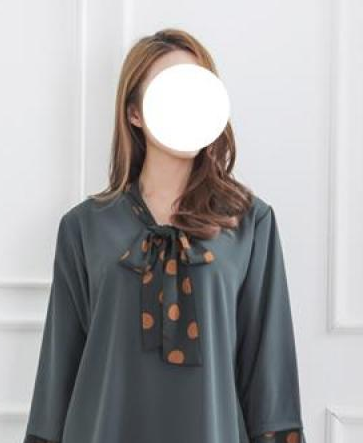

In [ ]:
pil_image

In [ ]:
img = Image.open(data_list[0]['file_name']).convert('RGB')

type(img)

PIL.Image.Image

In [ ]:
polygon = create_polygon(data_list[0]['points']['상의'][0])

In [ ]:
data_list[0]['file_name']

'/content/drive/MyDrive/fashiondata/data/train1/레트로/1153829.jpg'

In [ ]:
#extraction polygon

im = Image.open(data_list[0]['file_name']).convert("RGBA")

imArray = numpy.asarray(im)

maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]),0)

ImageDraw.Draw(maskIm).polygon(polygon, outline = 1, fill = 1)

mask = numpy.array(maskIm)

newImArray = numpy.empty(imArray.shape, dtype = 'uint8')

newImArray[:,:,:3] = imArray[:,:,:3]

newImArray[:,:,3] = mask*255

newIm = Image.fromarray(newImArray,"RGBA")

newIm.save("out.png")

In [ ]:
polygon

[]

In [ ]:
import matplotlib.pyplot as plt

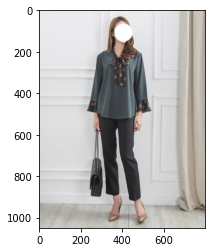

In [ ]:
plt.imshow(im)

In [ ]:
newImArray

array([[[238, 238, 240,   0],
        [237, 237, 239,   0],
        [235, 235, 237,   0],
        ...,
        [165, 152, 143,   0],
        [167, 153, 144,   0],
        [169, 155, 146,   0]],

       [[238, 238, 240,   0],
        [237, 237, 239,   0],
        [235, 235, 237,   0],
        ...,
        [165, 152, 143,   0],
        [168, 154, 145,   0],
        [170, 156, 147,   0]],

       [[238, 238, 240,   0],
        [237, 237, 239,   0],
        [235, 235, 237,   0],
        ...,
        [166, 153, 144,   0],
        [168, 154, 145,   0],
        [170, 156, 147,   0]],

       ...,

       [[193, 192, 187,   0],
        [194, 193, 188,   0],
        [195, 194, 189,   0],
        ...,
        [202, 202, 194,   0],
        [203, 203, 195,   0],
        [203, 203, 195,   0]],

       [[193, 192, 187,   0],
        [194, 193, 188,   0],
        [195, 194, 189,   0],
        ...,
        [203, 203, 195,   0],
        [204, 204, 196,   0],
        [204, 204, 196,   0]],

       [[192

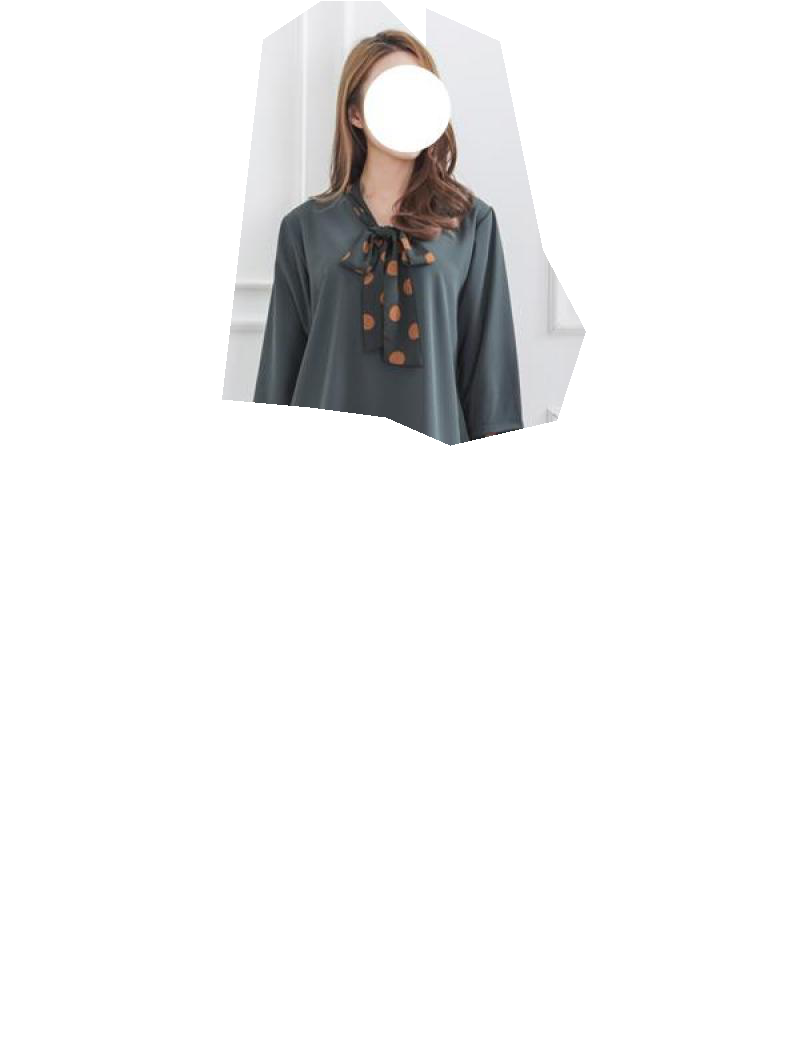

In [ ]:
Image.open("out.png").convert("RGBA")